In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV 
import pandas as pd
from xgboost import XGBClassifier, DMatrix, cv
import lightgbm

<function matplotlib.pyplot.show(close=None, block=None)>

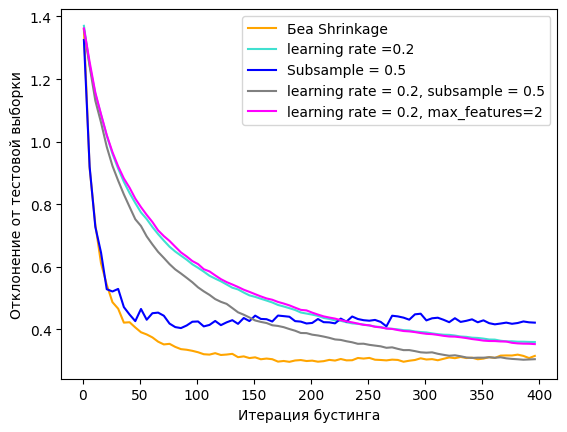

In [1]:
X, y = datasets.make_hastie_10_2(n_samples = 4200, random_state =1)
Labels, y = np.unique(y,return_inverse=True)
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.25)
original_params = {"n_estimators":400, "max_leaf_nodes":4, 'random_state': 2, 'max_depth':None, "min_samples_split":5}
plt. figure()
for label, color, setting in [
  ('Бea Shrinkage', 'orange', {'learning_rate':1, 'subsample':1.0}),
  ('learning rate =0.2', 'turquoise', {'learning_rate':0.2, 'subsample':1.0}),
  ('Subsample = 0.5', 'blue', {'learning_rate':1, 'subsample':0.5}),
  ('learning rate = 0.2, subsample = 0.5', 'gray', {'learning_rate':0.2, 'subsample':0.5}),
  ('learning rate = 0.2, max_features=2', 'magenta', {'learning_rate':0.2, 'max_features':2}),
]:
  params=dict(original_params)
  params.update(setting)
  gbc=GradientBoostingClassifier(**params)
  gbc.fit(X_train, Y_train)
  test_deviance=np.zeros((params['n_estimators']), dtype=np.float64)
  for i, y_proba in enumerate(gbc.staged_predict_proba(X_test)):
    test_deviance[i]=2*log_loss(Y_test, y_proba[:,1])
  plt.plot((np.arange(test_deviance.shape[0])+1)[::5], test_deviance[::5], "-", color=color, label=label)
plt.legend(loc='upper right')
plt.xlabel('Итерация бустинга')
plt.ylabel('Отклонение от тестовой выборки')
plt.show

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
! unzip /content/default+of+credit+card+clients.xls

--2023-04-20 07:32:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5539328 (5.3M) [application/x-httpd-php]
Saving to: ‘default of credit card clients.xls’

default of credit c 100%[===================>]   5.28M  6.66MB/s    in 0.8s    

2023-04-20 07:32:12 (6.66 MB/s) - ‘default of credit card clients.xls’ saved [5539328/5539328]

unzip:  cannot find or open /content/default+of+credit+card+clients.xls, /content/default+of+credit+card+clients.xls.zip or /content/default+of+credit+card+clients.xls.ZIP.


In [4]:
df=pd.read_excel('/content/default of credit card clients.xls', header=1)
x=df.iloc[:,1:-1]
y=df.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.25,random_state=100)

<function matplotlib.pyplot.show(close=None, block=None)>

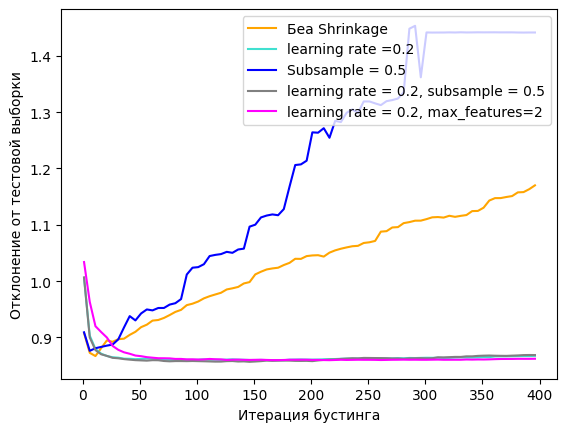

In [8]:
original_params = {"n_estimators":400, "max_leaf_nodes":4, 'random_state': 2, 'max_depth':None, "min_samples_split":5}
plt. figure()
for label, color, setting in [
  ('Бea Shrinkage', 'orange', {'learning_rate':1, 'subsample':1.0}),
  ('learning rate =0.2', 'turquoise', {'learning_rate':0.2, 'subsample':1.0}),
  ('Subsample = 0.5', 'blue', {'learning_rate':1, 'subsample':0.5}),
  ('learning rate = 0.2, subsample = 0.5', 'gray', {'learning_rate':0.2, 'subsample':0.5}),
  ('learning rate = 0.2, max_features=2', 'magenta', {'learning_rate':0.2, 'max_features':2}),
]:
  params=dict(original_params)
  params.update(setting)
  gbc=GradientBoostingClassifier(**params)
  gbc.fit(X_train, Y_train)
  test_deviance=np.zeros((params['n_estimators']), dtype=np.float64)
  for i, y_proba in enumerate(gbc.staged_predict_proba(X_test)):
    test_deviance[i]=2*log_loss(Y_test, y_proba[:,1])
  plt.plot((np.arange(test_deviance.shape[0])+1)[::5], test_deviance[::5], "-", color=color, label=label)
plt.legend(loc='upper right')
plt.xlabel('Итерация бустинга')
plt.ylabel('Отклонение от тестовой выборки')
plt.show

In [5]:
hyper_space = {'learning_rate': [0.1, 0.2, 0.3, 0.4], 'subsample':[0.4, 0.5, 0.6, 0.7], 'max_depth': [None, 3,6]}
gs=GridSearchCV(GradientBoostingClassifier(n_estimators=50), param_grid=hyper_space, scoring='accuracy')
gs.fit(X_train, Y_train)
print(gs.best_params_)
print(gs.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.7}
0.8217333333333334


In [6]:
xgb=XGBClassifier(n_estimators=50)
xgb.fit(X_train, Y_train)
print(accuracy_score(Y_train, xgb.predict(X_train)))
print(accuracy_score(Y_test, xgb.predict(X_test)))
hyper_space =  {'learning_rate': [0.1, 0.2, 0.3, 0.4], 'subsample':[0.4, 0.5, 0.6, 0.7], 'max_depth': [None, 3,6]}
gs=GridSearchCV(XGBClassifier(n_estimators=50), param_grid=hyper_space, scoring='accuracy')
gs.fit(X_train, Y_train)
print(gs.best_params_)
print(gs.best_score_)

0.8606666666666667
0.8168
{'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.6}
0.8220888888888889


In [22]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
def xgb_class(learning_rate, subsample, max_depth):
  params = {'booster':'gbtree', 
            'objective':'binary:logistic', 
            'eval_metric':'auc', 
            'is_unbalance':True, 
            'n_estimators':50, 
            'learning_rate':learning_rate, 
            'subsample':subsample, 
            'max_depth': int(max_depth), 
            'reg_alpha':0.1, 
            'reg_lambda':0.1, 
            'gamma':10, 
            'num_threads':20, 
            'min_child_weight':1, 
            'subsemple_freq':5, 
            'seed':42, 
            'verbosity':0, 
            'num_boost_round': 100}
  traing_data = DMatrix(X_train, Y_train)
  cv_result = cv(params,traing_data, 1000, early_stopping_rounds=100, stratified=True, nfold=3)
  return cv_result[ 'test-auc-mean' ].iloc[-1]
xgbbo=BayesianOptimization(xgb_class, {'learning_rate': (0.1, 0.4), 'subsample':(0.4, 0.7), 'max_depth': (3,6)})
xgbbo.maximize(n_itter=5, init_points=2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
|   iter    |  target   | learni... | max_depth | subsample |
-------------------------------------------------------------


<ipython-input-22-fa70aebb249c>:25: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  xgbbo.maximize(n_itter=5, init_points=2)


| 1         | 0.7712    | 0.3707    | 5.466     | 0.4701    |
| 2         | 0.774     | 0.2305    | 5.512     | 0.4395    |
| 3         | 0.7745    | 0.2632    | 3.766     | 0.4144    |
| 4         | 0.7766    | 0.1511    | 4.838     | 0.5051    |
| 5         | 0.7778    | 0.1129    | 4.88      | 0.4948    |
| 6         | 0.7771    | 0.1       | 4.99      | 0.4086    |
| 7         | 0.7782    | 0.1027    | 4.879     | 0.4836    |
| 8         | 0.7772    | 0.1       | 4.591     | 0.4       |
| 9         | 0.7772    | 0.1       | 4.317     | 0.4       |
| 10        | 0.7783    | 0.1       | 4.418     | 0.6427    |
| 11        | 0.7783    | 0.107     | 4.885     | 0.48      |
| 12        | 0.7745    | 0.2751    | 4.408     | 0.5712    |
| 13        | 0.7785    | 0.1       | 4.26      | 0.7       |
| 14        | 0.7784    | 0.1026    | 4.893     | 0.4877    |
| 15        | 0.7784    | 0.1008    | 4.111     | 0.6031    |
| 16        | 0.7782    | 0.2319    | 4.11      | 0.7       |
| 17    

In [13]:
def lgb_classifier(num_leaves, max_depth, lambda_l1, lambda_l2, min_chield_samples, min_data_in_leaf):
  params={'boosting_type':'gbdt', 
          'objective':'binary', 
          'metric':'auc', 
          'is_unbalance':True,
          'num_leaves':int(num_leaves), 
          'max_depth':int(max_depth), 
          'lambda_l1': lambda_l1, 
          'lambda_l2':lambda_l2, 
          'num_thrads':20,
          'min_chield_samples':int(min_chield_samples), 
          'min_data_in_leaf':int(min_data_in_leaf),
          'learning_rate':0.1,
          'subsample_seed':42, 
          'verbosity':-1 }
  training_data=lightgbm.Dataset(X_train, Y_train)
  cv_result=lightgbm.cv(params, training_data, 1000, stratified=True,nfold=3)
  return cv_result['auc-mean'][-1]

lgbo = BayesianOptimization(lgb_classifier, {'num_leaves':(25, 4000),
                                             'max_depth':(0, 9),
                                             'lambda_l1': (0.0, 0.1),
                                             'lambda_l2':(0.0, 0.1),
                                             'min_chield_samples':(50, 10000),
                                             'min_data_in_leaf':(100, 2000)})
lgbo.maximize(n_iter=15, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: min_chield_samples
[LightGBM] [Warning] Unknown parameter: subsample_seed
[LightGBM] [Warning] Unknown parameter: num_thrads
| 1         | 0.7743    | 0.05618   | 0.03059   | 1.723     | 4.661e+03 | 439.3     | 2.91e+03  |
| 2         | 0.7666    | 0.02018   | 0.02437   | 5.833     | 4.609e+03 | 1.745e+03 | 2.543e+03 |
| 3         | 0.77      | 0.0984    | 0.08026   | 3.091     | 2.905e+03 | 1.847e+03 | 951.8     |
| 4         | 0.7738    | 0.06681   | 0.02969   | 1.353     | 2.822e+03 | 1.276e+03 | 1.659e+03 |
| 5         | 0.7696    | 0.06702   | 0.02398   | 3.076     | 6.803e+03 | 1.815e+03 | 3.762e+03 |
| 6         | 0.7691    | 0.04494   | 0.02717   | 3.866     | 1.165e+03 | 1.202e+03 | 3.845e+03 |
| 7         | 0.7697    | 0.03102   | 0.02538   | 3